**1**.	Run a simple regression using wage as dependent variable, and age as explanatory variable


*   Interpret the meaning of the coefficient
*   Discuss the statistical significance of the coefficient


*   Discuss the statistical significance of the overall regression
*   Use be regression model to predict the wages


*   Plot the predictions against actual data using a scatter plot









In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("salary.csv")

In [ ]:
model = smf.ols('wage ~ age', data=data)
result = model.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     119.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           2.90e-27
Time:                        20:36:54   Log-Likelihood:                -15391.
No. Observations:                3000   AIC:                         3.079e+04
Df Residuals:                    2998   BIC:                         3.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7047      2.846     28.706      0.0

*   The coef of Age is 0.7073 which means that the when the age is increased by 1 year, the wage increases bu 0.71 units
*   Intercept 81.7 represent the expected wage when age=0


*   Age has significant effect on wage as its p-value<"0.05"


*  R^2= 0.038 this means that about 3.8% of the variability in wages is explained by age. This is a low value, meaning that age alone doesn't explain much of the variation in wages.








In [ ]:
wage_pred = result.predict()

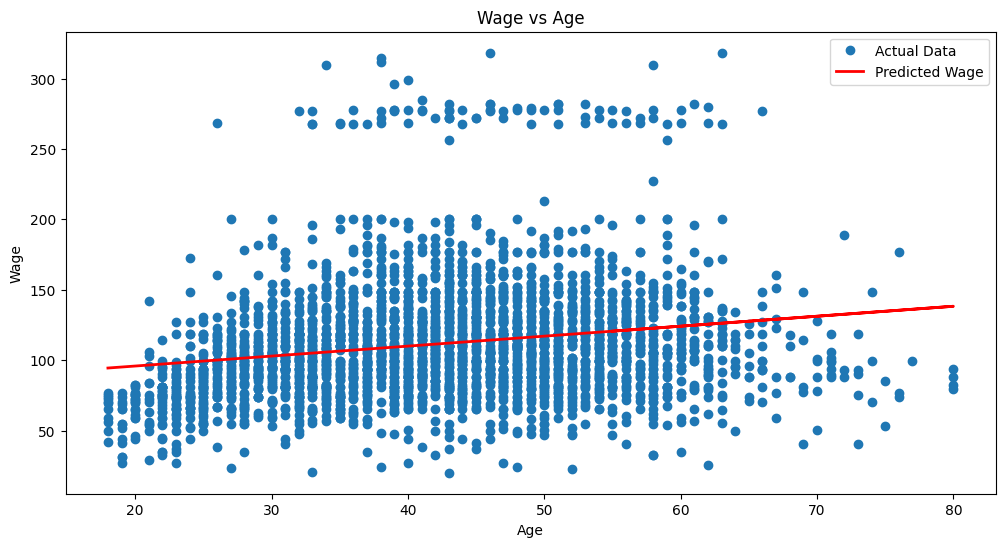

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['age'], data['wage'], 'o', label='Actual Data')
plt.plot(data['age'], wage_pred, 'r', linewidth=2, label='Predicted Wage')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Wage vs Age')
plt.legend()
plt.show()

2.	Run a multiple regression using wage as dependent variable, age, health_ins and education as explanatory variables


*   a.	Interpret the meaning of the coefficients
*   b.	Discuss the statistical significance of the coefficients


*   c.	Discuss the statistical significance of the overall regressions
*   d.	Evaluate the goodness of fit using R squared adjusted, interpret the meaning, compare to the R sq_adj from simple regression and conclude.





In [ ]:
model = smf.ols('wage ~ age + health_ins + education', data=data)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     212.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.45e-226
Time:                        20:47:49   Log-Likelihood:                -14917.
No. Observations:                3000   AIC:                         2.985e+04
Df Residuals:                    2993   BIC:                         2.989e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Intercept =74.4687: This represents the predicted wage when the individual has no health insurance, no formal education, and is 0 years old.

Health Insurance (No: -18.6455): Individuals without health insurance earn about 18.65 units less than those with health insurance, all else being equal. This is statistically significant (p-value = 0.000).

HS Grad (8.3554): High school graduates earn 8.36 units more than those with no formal education.

Some College (19.3087): Those with some college education earn 19.31 units more.

College Grad (34.0909): College graduates earn 34.09 units more.

Advanced Degree (58.5670): Individuals with advanced degrees earn 58.57 units more.

All education coefficients are highly significant, indicating a positive relationship between education level and wages. Higher levels of education lead to significantly higher wages.

Age (0.4703): Each additional year of age is associated with an increase of 0.47 units in wages, holding all other factors constant. This is a statistically significant effect (p-value = 0.000).

R-squared (0.299): Approximately 29.9% of the variance in wages is explained by age, health insurance, and education. These factors play an important role in determining wages.
Adjusted R-squared (0.298): This is very close to the R-squared value, indicating the model is not overfitted by the inclusion of additional variables and provides a reliable explanation of wage variability.

3.	Run a multiple regression using wage as dependent variable, age, sex and education and an interaction term between age and health_ins as explanatory variables


*   a.	Interpret the meaning of the coefficients
*   b.	Discuss the statistical significance of the coefficient of the interaction term and conclude



In [ ]:
model = smf.ols('wage ~ age * health_ins + sex + education', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     182.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.93e-225
Time:                        20:55:29   Log-Likelihood:                -14917.
No. Observations:                3000   AIC:                         2.985e+04
Df Residuals:                    2992   BIC:                         2.990e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Insurance (0.0604): This coefficient represents how the relationship between age and wage changes depending on health insurance status.
The effect is not statistically significant (p-value = 0.604).

Coefficient (-21.1497): In this model, the effect of not having health insurance on wages is more pronounced than in the previous model (from -18.65 to -21.15). It suggests that individuals without health insurance earn 21.15 units less than those with health insurance, and this effect remains highly statistically significant.

Coefficient (0.4481): The effect of age on wages is slightly smaller in this model (from 0.4703 to 0.4481), but it remains statistically significant. Wages increase by about 0.45 units for each additional year of age, even when accounting for the interaction term with health insurance.

The interaction term between age and health insurance is not statistically significant, meaning the effect of age on wages does not differ meaningfully based on whether an individual has health insurance or not.

4.	Create a new variable called log_age equal to natural logarithm of age
Sample code: dataset_name[log_variable_name]=np.log(dataset_name[variable_name])


In [ ]:
import numpy as np
data['log_age'] = np.log(data['age'])

In [ ]:
5.	Run  3 different multiple regression models using:
a.	wage as dependent variable, log_age and health_ins as explanatory variables
b.	logwage as dependent variable, age and health_ins as explanatory variables
c.	logwage as dependent variable, log_age and health_ins as explanatory variables
d.	For each of the three regression outputs Interpret the meaning of the coefficients


5.	Run  3 different multiple regression models using:

*   a. wage as dependent variable, log_age and health_ins as explanatory

*   b.	logwage as dependent variable, age and health_ins as explanatory variables


*  c.	logwage as dependent variable, log_age and health_ins as expl
d.	For each of the three regression outputs Interpret the meaning of the coefficients



In [ ]:
# a. Log_age and health_ins
model = smf.ols('wage ~ log_age + health_ins', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     219.8
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           8.34e-90
Time:                        21:04:54   Log-Likelihood:                -15245.
No. Observations:                3000   AIC:                         3.050e+04
Df Residuals:                    2997   BIC:                         3.051e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.8683    

In [ ]:
# b. Log_wage, age, and health_ins
data['log_wage'] = np.log(data['wage'])
model = smf.ols('log_wage ~ age + health_ins', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     295.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          9.96e-118
Time:                        21:04:27   Log-Likelihood:                -852.16
No. Observations:                3000   AIC:                             1710.
Df Residuals:                    2997   BIC:                             1728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.5166    

In [ ]:
# c. Log_wage, log_age, and health_ins
model = smf.ols('log_wage ~ log_age + health_ins', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     322.2
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.84e-127
Time:                        21:04:33   Log-Likelihood:                -829.72
No. Observations:                3000   AIC:                             1665.
Df Residuals:                    2997   BIC:                             1683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8132    

6.	Split the data into training(first 2500 observations)/testing sets(last 500 observations)


In [ ]:
train_data = data[:-500]
test_data = data[-500:]

7.	Choose all or several variables which you hypothesize to affect the wages and run a multiple regression using wage as dependent variable using the train data set

In [ ]:
model = smf.ols('wage ~ age + health_ins + education', data=train_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     175.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.62e-186
Time:                        21:21:02   Log-Likelihood:                -12414.
No. Observations:                2500   AIC:                         2.484e+04
Df Residuals:                    2493   BIC:                         2.488e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

8.	Use the model from the previous step and independent variables from the test data set to get predicted wages

In [ ]:
wage_pred_test = result.predict(test_data)
wage_pred_test

,0
2500,114.136416
2501,79.579635
2502,96.524145
2503,78.130927
2504,103.670229
...,...
2995,113.704527
2996,78.283971
2997,68.197499
2998,106.362428


9.	Calculate mse using the predictions form the previous step and actual wages from the test data set

In [ ]:
from statsmodels.tools.eval_measures import mse

mse_value = mse(test_data['wage'], wage_pred_test)
print(mse_value)

1309.1812169466843


10.	Select different sets of independent variables(may also try including interaction terms) and repeat the steps 7,8,and 9. Based on the MSE choose the model which performs better on the test set.

In [ ]:
model1 = smf.ols('wage ~ health_ins + education', data=train_data)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          5.21e-177
Time:                        21:39:05   Log-Likelihood:                -12439.
No. Observations:                2500   AIC:                         2.489e+04
Df Residuals:                    2494   BIC:                         2.492e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
wage_pred_test_1 = result1.predict(test_data)
wage_pred_test_1

,0
2500,112.709123
2501,82.724282
2502,91.031119
2503,74.031111
2504,104.402286
...,...
2995,112.709123
2996,82.724282
2997,74.031111
2998,112.709123


In [ ]:
mse_1_value = mse(test_data['wage'], wage_pred_test_1)
print(mse_1_value)

1359.205667559861


Removing age we can see that mse value becomes 1360 from 1310. This suggests that age is an important predictor in the regression model.